In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
#reading placement dataset
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package (in lpa)')

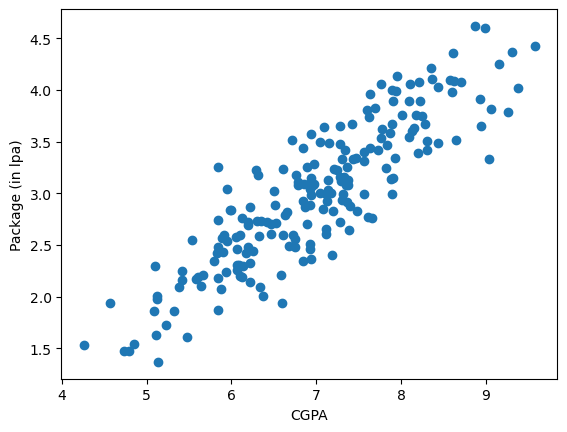

In [7]:
#creating plot
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')

In [11]:
X = df.iloc[:,0:1] # input Column all rows0-1
y = df.iloc[:, -1] # output Column

     cgpa
0    6.89
1    5.12
2    7.82
3    7.42
4    6.94
..    ...
195  6.93
196  5.89
197  7.21
198  7.63
199  6.22

[200 rows x 1 columns] 0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64


In [13]:
#splitting training data and testing data
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=2)

In [47]:
#training the model
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train) # for training
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [39]:
#making the prediction
lr.predict(X_test.iloc[4].values.reshape(1,1))

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.6537286])

Text(0, 0.5, 'Package (in lpa)')

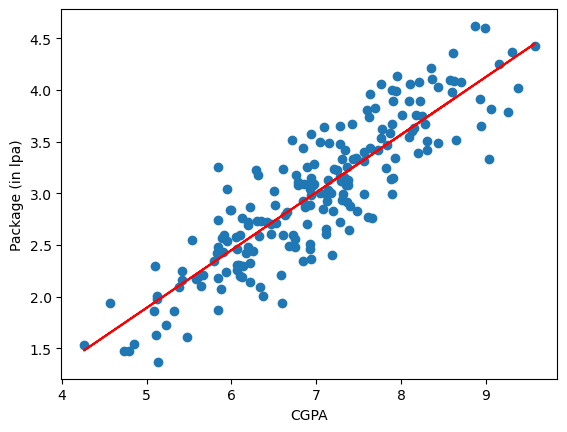

In [56]:
#again creating a plot to visualize linear regression line
plot=plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')

In [57]:
m = lr.coef_ # slope
c = lr.intercept_ # intercept
# y = mx + b
m* 8.58 + c

array([3.89111601])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


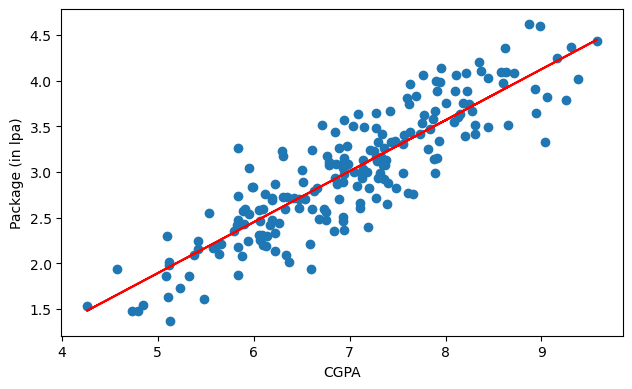

In [66]:
#GUI part
def predict_package():
    try:
        cgpa = float(entry_cgpa.get()) # Get CGPA from the input field
        predicted_package = lr.predict(np.array([[cgpa]])) [0] 
        #Predict the package
        label_predicted.config(text=f'Predicted Package:{predicted_package:.2f} LPA') 
    except ValueError:
        label_predicted.config(text="Invalid input. Pleaseenter a valid CGPA.")
#Setting GUI
root = tk.Tk()
root.title('Placement Package Predictor by Didar Abbas')
root.geometry ('800x400')
# Create a figure and axes for the plot
fig, ax = plt.subplots()
ax.scatter(df['cgpa'], df['package'])
ax.plot(X_train, lr.predict(X_train), color='red')
ax.set_xlabel('CGPA')
ax.set_ylabel('Package (in lpa)')

canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.LEFT,fill=tk.BOTH, expand=1) 
frame_right =tk.Frame(root)
frame_right.pack(side=tk. LEFT, padx=20)
#input fields                                   
label_cgpa = tk.Label(frame_right, text='Enter CGPA:')
label_cgpa.pack()
entry_cgpa = tk.Entry(frame_right)
entry_cgpa.pack()
#button to make predictions
btn_predict = tk.Button(frame_right, text='Predict',command=predict_package)
btn_predict.pack()
label_predicted = tk.Label(frame_right,text='Predicted Package:')
label_predicted.pack()
root.mainloop()

In [68]:
#creating class of Model 
class Model:
  def __init__(self):
    self.m=None
    self.b=None
  #fit method to find values of slope and intercept
  def fit(self,x_train,y_train):
    # calculating m
    num=0
    den=0
    for i in range(x_train.shape[0]):
      num=num+((x_train[i]-x_train.mean())*(y_train[i]-y_train.mean()))
      den=den+((x_train[i]-x_train.mean())*(x_train[i]-x_train.mean()))
    self.m=num/den
    self.b=y_train.mean()-(self.m*x_train.mean())
    print(self.m)
    print(self.b)
   #predict method for prediction
  def predict(self,x_test):
    return self.m*x_test+self.b


In [70]:
#reading dataset
import numpy as np
import pandas as pd
df=pd.read_csv('placement.csv')
df.head()


,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [72]:
x=df.iloc[:,0].values
y=df.iloc[:,1].values

In [76]:
#splitting train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
x_train.shape

(160,)

In [90]:
#Making object of Model class
lr=Model()
#fitting the model using method of class
lr.fit(x_train,y_train)
x_train.shape[0]
x_train[0]
x_train.mean()
x_test[0]
#prediction using class method
print(lr.predict(x_test[0]))

0.5579519734250721
-0.8961119222429152
3.891116009744203


In [113]:
import tkinter as tk 
from tkinter import ttk 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg 
#GUI code
def predict_package():
    try:
        cgpa = float(entry_cgpa.get())
        predicted_package = lr.predict(np.array([[cgpa]]))[0]
        label_predicted.config(text=f'Predicted Package: {predicted_package[0]:.2f} LPA')
    except ValueError:
        label_predicted.config(text="Invalid input. Please enter a valid CGPA.")
#creating window
root = tk.Tk()
root.title('Placement Package Predictor by Didar Abbas Using class')
root.geometry('300x200')
frame_right = tk.Frame(root)
frame_right.pack(padx=20, pady=20)
#label and input field
label_cgpa = tk.Label(frame_right, text='Enter CGPA:')
label_cgpa.pack()
entry_cgpa = tk.Entry(frame_right)
entry_cgpa.pack()
#button for making prediction and # Call predict_package here
btn_predict = tk.Button(frame_right, text='Predict', command=predict_package)  
btn_predict.pack()
label_predicted = tk.Label(frame_right, text='Predicted Package:')
label_predicted.pack()
# Start the tkinter event loop
root.mainloop()  



In [121]:
# prompt: in above code also add various regression metrics along with predicted package using gui
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, mean_absolute_percentage_error

#reading placement dataset
df = pd.read_csv('placement.csv')
df.head()
X = df.iloc[:,0:1] # input Column all rows0-1
y = df.iloc[:, -1] # output Column
#splitting training data and testing data
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=2)
#training the model
lr= LinearRegression()
lr.fit(X_train, y_train) # for training
#making the prediction
y_pred = lr.predict(X_test)
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Calculate MAE, MAPE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#GUI part
def predict_package():
    try:
        cgpa = float(entry_cgpa.get()) # Get CGPA from the input field
        predicted_package = lr.predict(np.array([[cgpa]])) [0] 
        #Predict the package
        label_predicted.config(text=f'Predicted Package:{predicted_package:.2f} LPA')
        #displaying various regression metrics
        label_mse.config(text=f"Mean Squared Error: {mse:.2f}")
        label_r2.config(text=f"R-squared: {r2:.2f}")
        label_mae.config(text=f"Mean Absolute Error:{mae:.2f}")
        label_mape.config(text=f"Mean Absolute Percentage Error:{mape:.2f}")
        label_rmse.config(text=f"Root Mean Squared Error:{rmse:.2f}")
    except ValueError:
        label_predicted.config(text="Invalid input. Pleaseenter a valid CGPA.")
#Setting GUI
root = tk.Tk()
root.title('Placement Package Predictor with regression metrics by Didar Abbas')
root.geometry ('300x300')
frame_right =tk.Frame(root)
frame_right.pack( padx=20,pady=20)
#input fields                                   
label_cgpa = tk.Label(frame_right, text='Enter CGPA:')
label_cgpa.pack()
entry_cgpa = tk.Entry(frame_right)
entry_cgpa.pack()
#button to make predictions
btn_predict = tk.Button(frame_right, text='Predict',command=predict_package)
btn_predict.pack()
label_predicted = tk.Label(frame_right,text='Predicted Package:')
label_predicted.pack()
#labels for various regression metrics
label_mse = tk.Label(frame_right, text="Mean Squared Error:")
label_mse.pack()
label_r2 = tk.Label(frame_right, text="R-squared:")
label_r2.pack()
label_mae = tk.Label(frame_right, text=f"MAE: {mae:.2f}")
label_mae.pack()
label_mape = tk.Label(frame_right, text=f"MAPE: {mape:.2f}")
label_mape.pack()
label_rmse = tk.Label(frame_right, text=f"RMSE: {rmse:.2f}")
label_rmse.pack()
root.mainloop()

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
